<a href="https://colab.research.google.com/github/yutongye616/python-colab/blob/main/correlation_computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting correlation matrix computation benchmark...
Matrix dimensions (N x D):  10 10
Matrix dimensions (N x D):  20 10
Matrix dimensions (N x D):  30 10
Matrix dimensions (N x D):  40 10
Matrix dimensions (N x D):  50 10
Matrix dimensions (N x D):  60 10
Matrix dimensions (N x D):  70 10
Matrix dimensions (N x D):  80 10
Matrix dimensions (N x D):  90 10
Matrix dimensions (N x D):  100 10
Matrix dimensions (N x D):  110 10
Matrix dimensions (N x D):  120 10
Matrix dimensions (N x D):  130 10
Matrix dimensions (N x D):  140 10


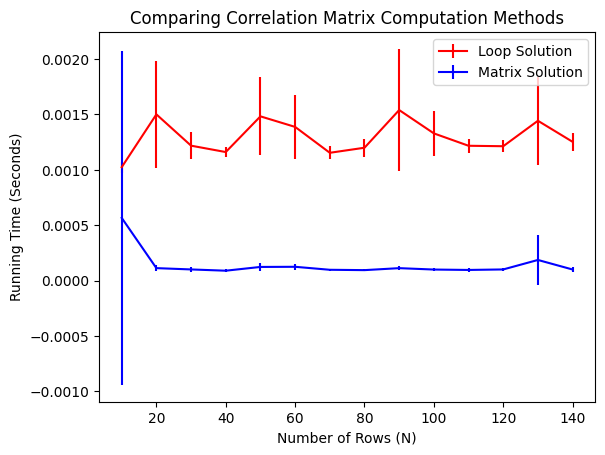

Result written to CompareCorrelationFig.pdf


In [1]:
import numpy as np
import time

def compute_correlation_naive(X):
    """
    Compute correlation matrix using nested loops
    X: input matrix (N x D)
    Returns: correlation matrix (D x D)
    """
    N, D = X.shape
    M = np.zeros((D, D))
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0, ddof=1)

    for i in range(D):
        for j in range(D):
            if stds[i] == 0 or stds[j] == 0:
                M[i, j] = 1.0 if i == j else 0.0
            else:
                covariance = np.sum((X[:, i] - means[i]) * (X[:, j] - means[j])) / (N - 1)
                M[i, j] = covariance / (stds[i] * stds[j])
    return M

def compute_correlation_smart(X):
    """
    Compute correlation matrix using vectorization
    X: input matrix (N x D)
    Returns: correlation matrix (D x D)
    """
    N, D = X.shape
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    # Compute covariance matrix
    covariance = (X_centered.T @ X_centered) / (N - 1)
    # Compute standard deviations
    stds = np.sqrt(np.diag(covariance))
    # Compute denominator matrix
    denominator = np.outer(stds, stds)
    # Compute correlation matrix
    correlation = covariance / denominator
    # Handle division by zero (when std = 0)
    np.fill_diagonal(correlation, 1.0)
    return correlation

print('Starting correlation matrix computation benchmark...')
np.random.seed(100)
params = range(10, 141, 10)   # different param setting
nparams = len(params)       # number of different parameters

perf_loop = np.zeros([10, nparams])  # 10 trials = 10 rows, each parameter is a column
perf_cool = np.zeros([10, nparams])

counter = 0

for N in params:  # N is the parameter for x-axis (number of samples)
    D = 10  # Fixed number of features for simplicity

    print("Matrix dimensions (N x D): ", N, D)

    for i in range(10):
        X = np.random.rand(N, D)   # random matrix

        st = time.time()
        corr_loop = compute_correlation_naive(X)
        et = time.time()
        perf_loop[i, counter] = et - st

        st = time.time()
        corr_cool = compute_correlation_smart(X)
        et = time.time()
        perf_cool[i, counter] = et - st

        assert np.allclose(corr_loop, corr_cool, atol=1e-06)

    counter = counter + 1

mean_loop = np.mean(perf_loop, axis=0)
mean_cool = np.mean(perf_cool, axis=0)
std_loop = np.std(perf_loop, axis=0)
std_cool = np.std(perf_cool, axis=0)

import matplotlib.pyplot as plt
plt.errorbar(params, mean_loop[0:nparams], yerr=std_loop[0:nparams], color='red', label='Loop Solution')
plt.errorbar(params, mean_cool[0:nparams], yerr=std_cool[0:nparams], color='blue', label='Matrix Solution')
plt.xlabel('Number of Rows (N)')
plt.ylabel('Running Time (Seconds)')
plt.title('Comparing Correlation Matrix Computation Methods')
plt.legend()
plt.savefig('CompareCorrelationFig.pdf')
plt.show()

print("Result written to CompareCorrelationFig.pdf")